In [1]:
import os
import ktrain
from ktrain import text

In [2]:
trn, val, preproc = text.texts_from_folder('dataset',maxlen=500,preprocess_mode='bert',train_test_names=['train', 'test'],classes=['none', 'racism', 'sexism'])

detected encoding: utf-8
preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [3]:
model = text.text_classifier('bert', trn , preproc=preproc)

Is Multi-Label? False
maxlen is 500
done.


In [4]:
learner = ktrain.get_learner(model,train_data=trn,val_data=val,batch_size=3)

In [2]:
#learner.lr_find()
#learner.lr_plot()

In [6]:
learner.fit_onecycle(2e-5, 10)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
5273/5273 [==============================] - 41927s 8s/step - loss: 0.6076 - accuracy: 0.7573 - val_loss: 0.4009 - val_accuracy: 0.8566
Epoch 2/10
5273/5273 [==============================] - 44948s 9s/step - loss: 0.3370 - accuracy: 0.8658 - val_loss: 0.4073 - val_accuracy: 0.8382
Epoch 3/10
5273/5273 [==============================] - 42685s 8s/step - loss: 0.2302 - accuracy: 0.9108 - val_loss: 0.5087 - val_accuracy: 0.8493
Epoch 4/10
5273/5273 [==============================] - 45675s 9s/step - loss: 0.1308 - accuracy: 0.9521 - val_loss: 0.5941 - val_accuracy: 0.8199
Epoch 5/10
5273/5273 [==============================] - 42992s 8s/step - loss: 0.0871 - accuracy: 0.9708 - val_loss: 0.6438 - val_accuracy: 0.8162
Epoch 6/10
 658/5273 [==>...........................] - ETA: 12:39:58 - loss: 0.0602 - accuracy: 0.9824

ResourceExhaustedError:  OOM when allocating tensor with shape[3,500,768] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[node gradient_tape/model_1/Encoder-12-FeedForward-Norm/BroadcastTo_1 (defined at D:\ProgramData\Anaconda3\lib\site-packages\ktrain\core.py:1133) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_train_function_34619]

Function call stack:
train_function


In [1]:
import keras
from matplotlib import pyplot as plt

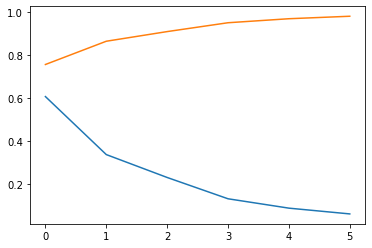

In [4]:
x=[0.6076,0.3370,0.2302,0.1308,0.0871,0.0602]
y=[0.7573,0.8658,0.9108,0.9521,0.9708,0.9824]
plt.plot(x,label="loss")
plt.plot(y,label)

In [7]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [8]:
predictor.save('model_BERT')

In [9]:
p = ktrain.load_predictor('model_BERT')

In [10]:
data = [ 'wants to hang out with friends SOON!',
         'dude, that is my favorite sandwich place ever. ummm did you take PICTURES?',
         ]

In [11]:
p.predict(data)

D:\ProgramData\Anaconda3\lib\site-packages\ktrain\text\preprocessor.py:216: UserWarning: List or array of two texts supplied, so task being treated as text classification. If this is a sentence pair classification task, please cast to tuple.
  'If this is a sentence pair classification task, please cast to tuple.')


['none', 'none']